In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("./style.mplstyle")

import seaborn as sns;sns.set()

df = pd.read_csv("spinnaker_results.csv")

mask = (df['pop'] == 'exc')
df = df.loc[mask]

df.exc_conn_p *= 100
df.inh_conn_p *= 100

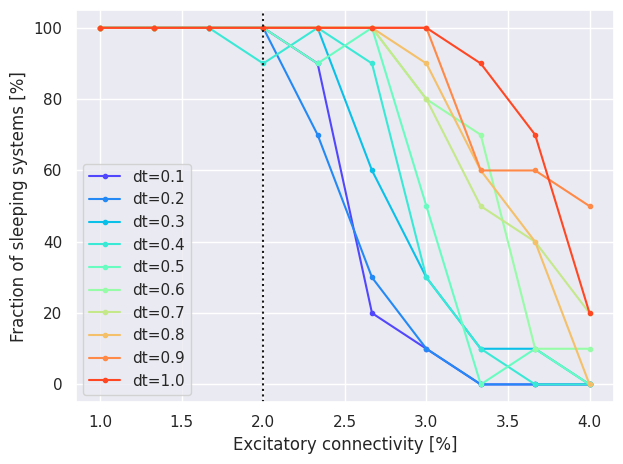

In [13]:
colors = sns.color_palette('rainbow', 10)
for dt ,c in zip(np.sort(df.timestep.unique()), colors):
    submask = (df.timestep == dt)*(df.func == 'avg_activity')
    subdf = df[submask].copy()
    subdf['is_asleep'] = (subdf.extraction.values < 2.0).astype(int)
    grouped = subdf.groupby('exc_conn_p')[['exc_conn_p', 'extraction', 'is_asleep']].mean()

    plt.plot(grouped.exc_conn_p, grouped.is_asleep*100,  marker=".", label=f"dt={dt}", color=c)

plt.axvline(2, color="k", ls=":")
plt.ylabel('Fraction of sleeping systems [%]')
plt.xlabel('Excitatory connectivity [%]')
plt.legend()

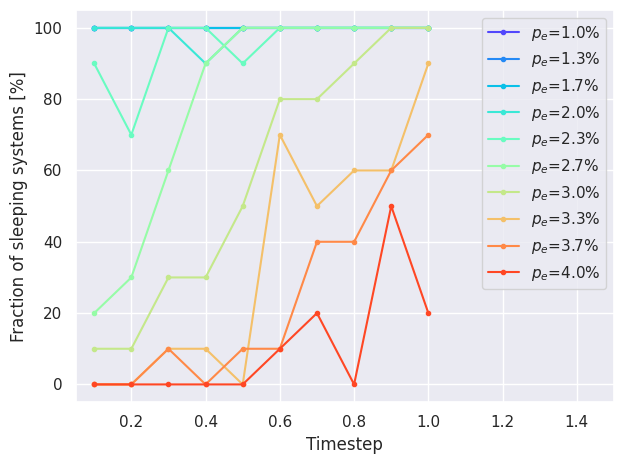

In [12]:
colors = sns.color_palette('rainbow', 10)
for pexc ,c in zip(np.sort(df.exc_conn_p.unique()), colors):
    submask = (df.exc_conn_p == pexc)*(df.func == 'avg_activity')
    subdf = df[submask].copy()
    subdf['is_asleep'] = (subdf.extraction.values < 2.0).astype(int)
    grouped = subdf.groupby('timestep')[['timestep', 'extraction', 'is_asleep']].mean()

    plt.plot(grouped.timestep, grouped.is_asleep*100,  marker=".", label=f"$p_e$={pexc:.1f}%", color=c)

plt.xlim(0.05, 1.5)
plt.ylabel('Fraction of sleeping systems [%]')
plt.xlabel('Timestep')
plt.legend()

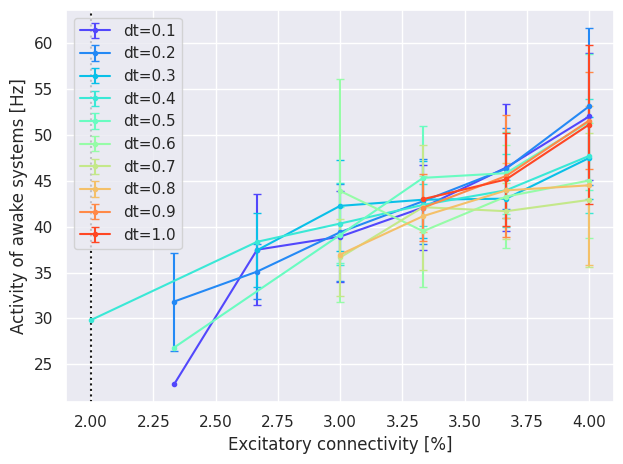

In [5]:
colors = sns.color_palette('rainbow', 10)
for dt ,c in zip(np.sort(df.timestep.unique()), colors):
    submask = (df.timestep == dt)&(df.func == 'avg_activity')&(df.extraction > 2 )
    subdf = df[submask]
    avgs = subdf.groupby('exc_conn_p')[['exc_conn_p', 'extraction']].mean()
    stds = subdf.groupby('exc_conn_p')[['exc_conn_p', 'extraction']].std()

    plt.errorbar(avgs.exc_conn_p, avgs.extraction, stds.extraction,  marker=".", label=f"dt={dt}", color=c)

plt.axvline(2, color="k", ls=":")
plt.ylabel('Activity of awake systems [Hz]')
plt.xlabel('Excitatory connectivity [%]')
plt.legend()

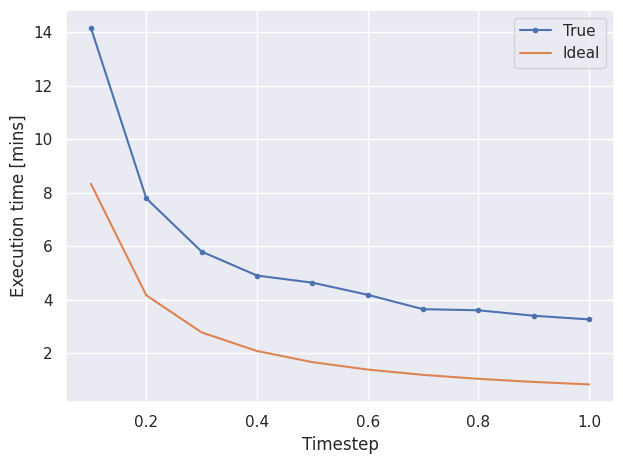

In [6]:
subdf = df.groupby('timestep')[['timestep', 'run_time', 'duration', 'time_scale_factor']].mean()
plt.plot(subdf.timestep, subdf.run_time/60, marker=".", label="True")
plt.plot(subdf.timestep, (subdf.duration*1e-3)*subdf.time_scale_factor/subdf.timestep/60, label="Ideal")
plt.xlabel('Timestep')
plt.ylabel("Execution time [mins]")
plt.legend()